## Finding Heavy Traffic Indicators on I-94
### Guided Project - Dataquest

We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway. John Hogue made the dataset available. We downloaded it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

The goal of our analysis is to determine a few indicators of heavy traffic on I-94 as `weather type`, `time of the day`, `time of the week`, etc.

Let's start reading in the Metro_Interstate_Traffic_Volume.csv file and examining the first and the last five rows.

In [1]:
#import libreries
import pandas as pd

#import files
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

print('First rows: \n',traffic.head(5))
print('Last rows: \n',traffic.tail(5))
print('Info: \n',traffic.info())

First rows: 
   holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
Last rows: 
       holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  

There are 48204 rows and 9 columns:

- `holiday`: Categorical US National holidays plus regional holiday, Minnesota State Fair
- `temp`: Numeric Average temp in kelvin
- `rain_1h`: Numeric Amount in mm of rain that occurred in the hour
- `snow_1h`: Numeric Amount in mm of snow that occurred in the hour
- `clouds_all`: Numeric Percentage of cloud cover
- `weather_main`: Categorical Short textual description of the current weather
- `weather_description`: Categorical Longer textual description of the current weather
- `date_time`: DateTime Hour of the data collected in local CST time - %Y-%m-%d %H:%M:%s 
- `traffic_volume`: Numeric Hourly I-94 ATR 301 reported westbound traffic volume

Each row represents an hour from 2012-10-02 to 2018-09-30 and it is focused on data reported by I-94 ATR 301 (midway between Minneapolis and Saint Paul) with cars moving from east to west.

#### How is the distribution of the traffic volume?

In [2]:
#Importing pandas lib

import pandas as pd

#Adding matplotlib in Jupyter

import matplotlib.pyplot as plt
%matplotlib inline

temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
Name: traffic_volume, dtype: float64


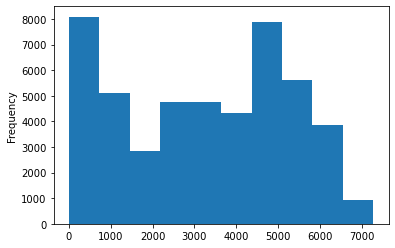

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


In [3]:
#Let's see correlation between volume of traffic and other numeric indicators
r = traffic.corr()['traffic_volume']
print(r)

traffic['traffic_volume'].plot.hist()
plt.show()

print(traffic['traffic_volume'].describe())

Volume of traffic show a positive correlation with temperature (0.13). That mean that if temperature is higher, there are more traffic. Maybe it could be related to nights are colder than daytimes and it is more probable to use cars during daytimes.

Very weak correlation with rain (0.004714), snow(0.000733) or clouds (0.067054). It seems that people are using their cars without paying attention to weather conditions.

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the minimum volume of traffic was 0 and the maximum was 7280 cars/hour. The mean volume of traffic was 3259 cars/hour.

About 25% of the time, there were 1193 cars or fewer passing the station each hour.
About 75% of the time, the traffic volume was four times as much (4933 cars or more).

#### Daytime vs Nighttime

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)


In [4]:
#Changing date_time type to datetime type.

traffic['date_time'] = pd.to_datetime(traffic['date_time'])

#Isolating daytime and nightime data
daytime = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
nighttime = traffic[(traffic['date_time'].dt.hour < 7) | (traffic['date_time'].dt.hour >= 19)]

print('Rows for day time hours: ',daytime.shape)
print('Rows for night time hours: ',nighttime.shape)

Rows for day time hours:  (23877, 9)
Rows for night time hours:  (24327, 9)


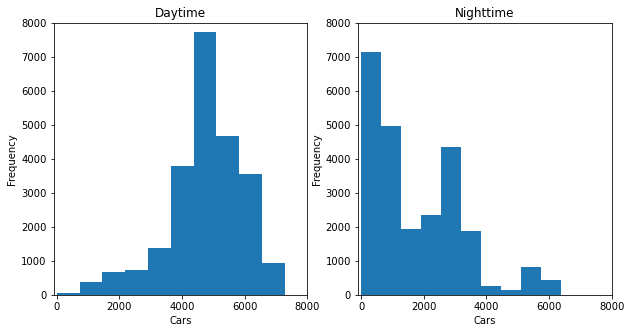

Description for daytime: 
 count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Description for nighttime: 
 count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


In [5]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
daytime['traffic_volume'].plot.hist()
plt.title('Daytime')
plt.xlabel('Cars')
plt.ylabel('Frequency')
plt.ylim(0,8000)
plt.xlim(-100,8000)

plt.subplot(1,2,2)
nighttime['traffic_volume'].plot.hist()
plt.title('Nighttime')
plt.xlabel('Cars')
plt.ylabel('Frequency')
plt.ylim(0,8000)
plt.xlim(-100,8000)

plt.show()

print('Description for daytime: \n',daytime['traffic_volume'].describe())
print('\nDescription for nighttime: \n',nighttime['traffic_volume'].describe())

Daytime histogram show a normal distribution while nighttime histogram show a right (positive) skewed distribution
Daytime histogram indicates that counting more than 4000 cars per hour is the average while nighttime one indicates that it is very probably that there are few cars.

As we said our goal is to determine indicators of heavy traffic so we can drop data for the nighttime. During the 75% of time at night, there are not more than 2819 cars.

### Traffic vs Time

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

In [20]:
#Creating new columns for month, day of the week and time of day
daytime['month'] = daytime['date_time'].dt.month
daytime['hour'] = daytime['date_time'].dt.hour
daytime['weekday'] = daytime['date_time'].dt.dayofweek # 0= Monday 1 = Tuesday,...5=Saturday, 6=Sunday

#Calculating mean of traffic_volumen per month
by_month = daytime.groupby('month').mean()
print(by_month['traffic_volume'])

#Calculating mean of traffic_volumen per hour
by_hour = daytime.groupby('hour').mean()
print(by_hour['traffic_volume'])

#Calculating mean of traffic_volumen per month
by_day = daytime.groupby('weekday').mean()
print(by_day['traffic_volume'])

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64
hour
7     4740.181337
8     4587.497115
9     4385.277502
10    4184.665544
11    4465.877561
12    4718.293095
13    4714.940682
14    4931.888776
15    5240.524302
16    5663.756539
17    5310.076048
18    4263.718530
Name: traffic_volume, dtype: float64
weekday
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64


C:\Users\laura\AppData\Local\Temp\ipykernel_20764\3538753139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['month'] = daytime['date_time'].dt.month
C:\Users\laura\AppData\Local\Temp\ipykernel_20764\3538753139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['hour'] = daytime['date_time'].dt.hour
C:\Users\laura\AppData\Local\Temp\ipykernel_20764\3538753139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

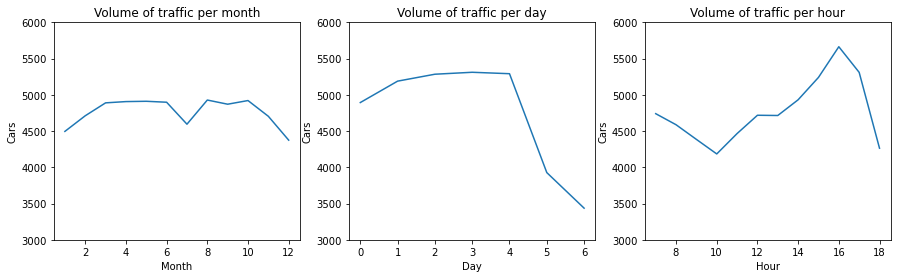

In [21]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
by_month['traffic_volume'].plot.line()
plt.title('Volume of traffic per month')
plt.xlabel('Month')
plt.ylabel('Cars')
plt.ylim(3000,6000)

plt.subplot(1,3,2)
by_day['traffic_volume'].plot.line()
plt.title('Volume of traffic per day')
plt.xlabel('Day')
plt.ylabel('Cars')
plt.ylim(3000,6000)

plt.subplot(1,3,3)
by_hour['traffic_volume'].plot.line()
plt.title('Volume of traffic per hour')
plt.xlabel('Hour')
plt.ylabel('Cars')
plt.ylim(3000,6000)

plt.show()

We can see that the volume of traffic decreased in December-January (Christmas holidays or cold months) and July (summer holidays). But why July and not August? We should check this behaviour every year...

If we check the volume of traffic per day there a clear difference between business days (0-4 or Monday to Friday) and the weekend (5-6 or Saturday and Sunday). Regarding the hour plot, there are more cars at 7:00 or 16:00 which could be the hours of entry and end of work. Let's check the hour data separating business days and weekends.

C:\Users\laura\AppData\Local\Temp\ipykernel_20764\2214574599.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july['year'] = july['date_time'].dt.year


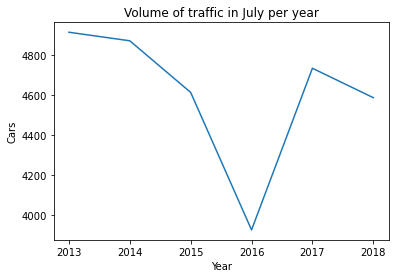

In [27]:
#Calculating mean of traffic_volumen in July per year

july = daytime[daytime['date_time'].dt.month == 7]
july['year'] = july['date_time'].dt.year

july_by_year = july.groupby('year').mean()

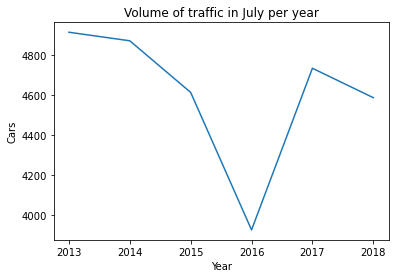

In [28]:
july_by_year['traffic_volume'].plot.line()
plt.title('Volume of traffic in July per year')
plt.xlabel('Year')
plt.ylabel('Cars')
plt.show()

We can see that in July 2016 happened something in this part of I-94 but the volume of traffic follows the usual trend in 2013, 2014, 2015, 2017 and 2018. So this decrease was not related to the summer holidays.

Now it is time to check the hour data separating business days and weekends.

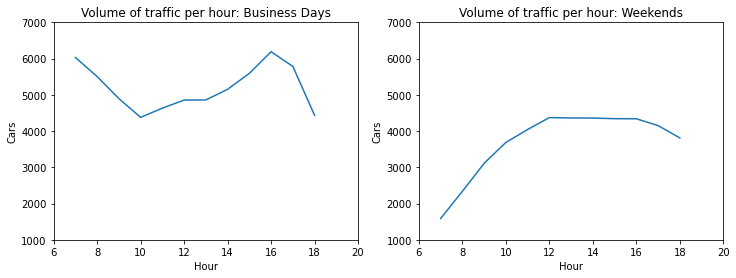

In [37]:
weekend_hour = daytime[daytime['weekday'] >= 5]
business_hour = daytime[daytime['weekday'] < 5]

by_hour_w = weekend_hour.groupby('hour').mean()
by_hour_b = business_hour.groupby('hour').mean()

plt.figure(figsize=(12,4))

plt.subplot(1,2,2)
by_hour_w['traffic_volume'].plot.line()
plt.title('Volume of traffic per hour: Weekends')
plt.xlabel('Hour')
plt.ylabel('Cars')
plt.ylim (1000,7000)
plt.xlim (6,20)

plt.subplot(1,2,1)
by_hour_b['traffic_volume'].plot.line()
plt.title('Volume of traffic per hour: Business Days')
plt.xlabel('Hour')
plt.ylabel('Cars')
plt.ylim (1000,7000)
plt.xlim (6,20)

plt.show()

Rush hours in business days at 07:00 and 16:00 (start and end of work: people travel from home to work and back).
Most people use cars on weekends from 10:00/11:00 in a similar way until 18:00.

We reach the following conclusions:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16 when people travel from home to work and back.

#### Weather Indicators

As we said before, the volume of traffic show a positive correlation with temperature (0.13). That means that if temperature is higher, there are more traffic. Maybe it could be related to nights are colder than daytimes and it is more probable to use cars during daytimes.

Very weak correlation with rain (0.004714), snow(0.000733) or clouds (0.067054). It seems that people are using their cars without paying attention to weather conditions.

In [38]:
r = traffic.corr()['traffic_volume']
print(r)

temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
Name: traffic_volume, dtype: float64


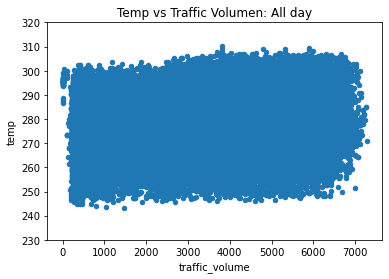

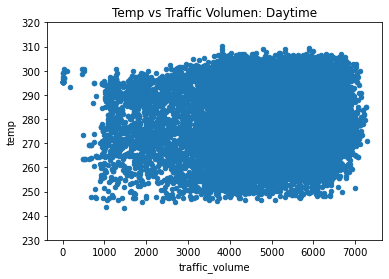

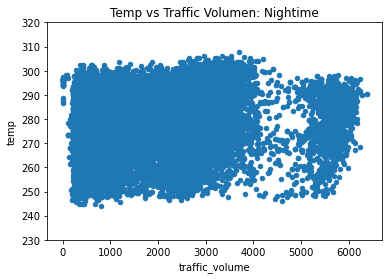

In [46]:
traffic.plot.scatter('traffic_volume','temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.title('Temp vs Traffic Volumen: All day')
plt.show()

daytime.plot.scatter('traffic_volume','temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.title('Temp vs Traffic Volumen: Daytime')
plt.show()

nighttime.plot.scatter('traffic_volume','temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.title('Temp vs Traffic Volumen: Nightime')
plt.show()

Temperature is not a solid indicator for the use of the car.

We are going to analyse `weather_main` and `weather_description`.

In [48]:
print(daytime['weather_main'].unique())
print(daytime['weather_description'].unique())

['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Smoke' 'Squall']
['scattered clouds' 'broken clouds' 'overcast clouds' 'sky is clear'
 'few clouds' 'light rain' 'light intensity drizzle' 'mist' 'haze'
 'proximity shower rain' 'moderate rain' 'drizzle' 'heavy intensity rain'
 'fog' 'proximity thunderstorm' 'heavy snow' 'snow' 'freezing rain'
 'shower snow' 'light rain and snow' 'light intensity shower rain'
 'thunderstorm with heavy rain' 'thunderstorm with rain'
 'thunderstorm with light rain' 'proximity thunderstorm with rain'
 'heavy intensity drizzle' 'Sky is Clear' 'very heavy rain'
 'proximity thunderstorm with drizzle' 'light snow'
 'thunderstorm with drizzle' 'thunderstorm' 'smoke' 'SQUALLS'
 'light shower snow' 'sleet' 'thunderstorm with light drizzle'
 'shower drizzle']


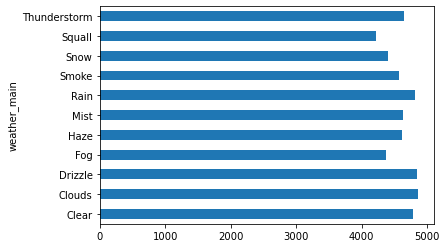

In [50]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

by_weather_main['traffic_volume'].plot.barh()
plt.show()

Analysing the bar plot for `weather_main` there is any weather condition which makes increase the volume of traffic over 5000.

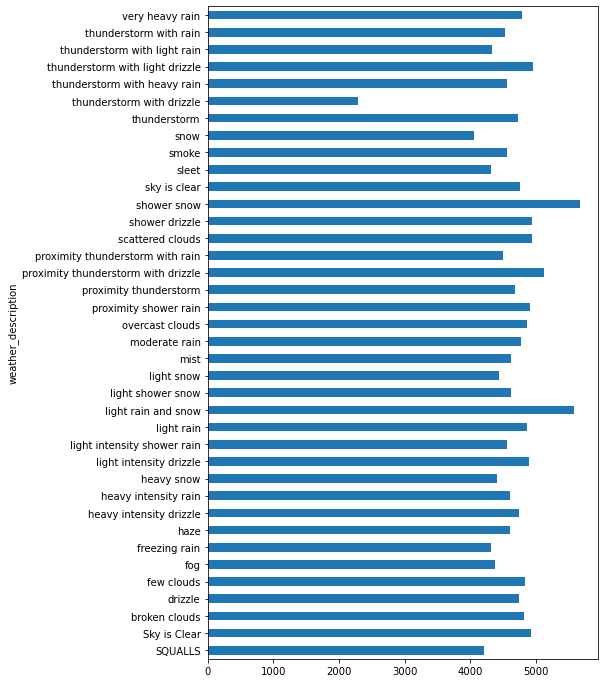

In [56]:
plt.figure(figsize=(7,12))
by_weather_description['traffic_volume'].plot.barh()
plt.show()

The weather types that makes exceede the traffic volume over 5000 are 'light rain and snow' and 'shower snow'.

#### Conclusion
The indicators of heavy traffic on I-94 highway are related to time (period of year, weekends vs. business days and hours).
Weather conditions seems to not affected a lot to the use of this highway (very little increase due to light rain/snow and shower snow, a decrease of use of car when thunderstorm with drizzle)

Maybe weather conditions affect more on weekends or during night or in roads that are not a highway when people do not have to go to work.

Let's check weekends!

In [67]:
weekend_traffic = daytime[daytime['weekday'] >= 5]
weekend_traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,hour,weekday
87,None,275.17,0.0,0.0,1,Clear,sky is clear,2012-10-06 07:00:00,2072,10,7,5
88,None,274.99,0.0,0.0,1,Clear,sky is clear,2012-10-06 08:00:00,3342,10,8,5
89,None,275.09,0.0,0.0,40,Clouds,scattered clouds,2012-10-06 09:00:00,4258,10,9,5
90,None,276.88,0.0,0.0,20,Clouds,few clouds,2012-10-06 10:00:00,4861,10,10,5
91,None,278.04,0.0,0.0,20,Clouds,few clouds,2012-10-06 11:00:00,5191,10,11,5


In [66]:
weekend_traffic.corr()['traffic_volume']

temp              0.194895
rain_1h          -0.112488
snow_1h          -0.026517
clouds_all       -0.021636
traffic_volume    1.000000
month            -0.010350
hour              0.604632
weekday          -0.222118
Name: traffic_volume, dtype: float64

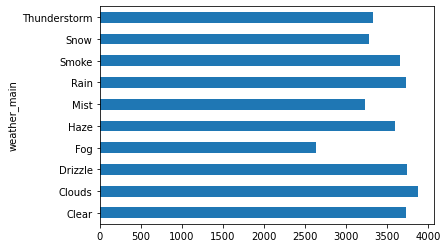

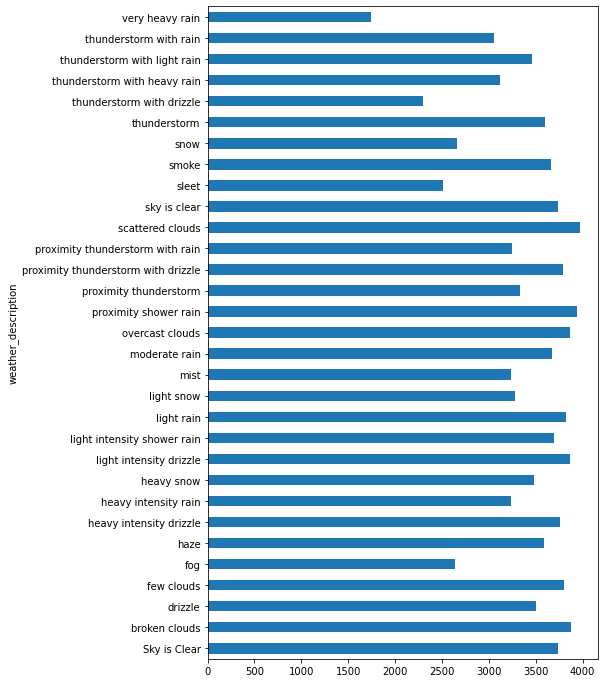

In [71]:
by_weather_main_w = weekend_traffic.groupby('weather_main').mean()
by_weather_description_w = weekend_traffic.groupby('weather_description').mean()

by_weather_main_w['traffic_volume'].plot.barh()
plt.show()

plt.figure(figsize=(7,12))
by_weather_description_w['traffic_volume'].plot.barh()
plt.show()

During weekends we can see that people avoid using car when the weather conditions are really bad as 'fog', 'very heavy rain' or 'thunderstorm with drizzle'. Again, the traffic volume have more correlation with time (0.6)